In [2]:
import sys
sys.path.append('../')

import HuichuanFlow as ms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [4]:
# 读取图像，归一化
pic = matplotlib.image.imread('../data/mondrian.jpg') / 255

# 图像尺寸
w, h = pic.shape

In [5]:
# Sobel滤波器
sobel = ms.core.Variable(dim=(3, 3), init=False, trainable=False)
sobel.set_value(np.mat([[1, 0, -1], [2, 0, -2], [1, 0, -1]]))

In [6]:
# 输入图像
img = ms.core.Variable(dim=(w, h), init=False, trainable=False)
img.set_value(np.mat(pic))


In [7]:
# Sobel滤波器输出
sobel_output = ms.ops.Convolve(img, sobel)


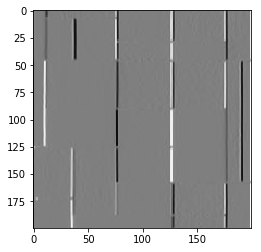

In [8]:
# 输出图像
sobel_output.forward()
plt.imshow(sobel_output.value, cmap="gray")


In [9]:
# 可训练滤波器
filter_train = ms.core.Variable(dim=(3, 3), init=True, trainable=True)
filter_output = ms.ops.Convolve(img, filter_train)

# 常数矩阵：-1
minus = ms.core.Variable(dim=(w, h), init=False, trainable=False)
minus.set_value(np.mat(-np.ones((w, h))))

# 常数（矩阵）：图像总像素数的倒数
n = ms.core.Variable((1, 1), init=False, trainable=False)
n.set_value(np.mat(1.0 / (w * h)))


In [10]:
# 损失值，均方误差
error = ms.ops.Add(sobel_output, ms.ops.Multiply(filter_output, minus))
square_error = ms.ops.MatMul(
                    ms.ops.Reshape(error, shape=(1, w * h)), 
                    ms.ops.Reshape(error, shape=(w * h, 1))
                )

mse = ms.ops.MatMul(square_error, n)

# 优化器
optimizer = ms.optimizer.Adam(ms.core.default_graph, mse, 0.01)


iteration:0,loss:0.0291994194
iteration:1,loss:0.0284777479
iteration:2,loss:0.0277706360
iteration:3,loss:0.0270778646
iteration:4,loss:0.0263992171
iteration:5,loss:0.0257344790
iteration:6,loss:0.0250834375
iteration:7,loss:0.0244458823
iteration:8,loss:0.0238216052
iteration:9,loss:0.0232103996
[[ 1.0254245   0.01727321 -1.04159052]
 [ 1.02951859  0.01325006 -1.04282807]
 [ 1.02818624  0.007526   -1.03754936]]


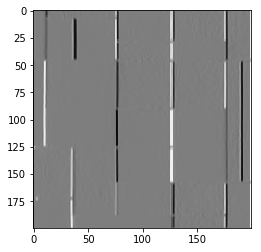

In [12]:
# 训练
for i in range(10):
    
    optimizer.one_step()
    optimizer.update()               
    mse.forward()
    print("iteration:{:d},loss:{:.10f}".format(i, mse.value[0, 0]))


# 被训练完成的滤波器
filter_train.forward()
print(filter_train.value)

# 用被训练的滤波器滤波图像
filter_output.forward()
plt.imshow(filter_output.value, cmap="gray")